# Классификация заемщиков линейными моделями



Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные).

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение и тест.

Код в чтение, разбиение менять не нужно.

Выполняя задания, не забывайте про [устав](https://t.me/c/2206639786/270/271).

In [214]:
# не меняем код
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150


data = pd.read_csv('application_train.csv')
data.columns = ['sk_id_curr', 'target'] + list(data.columns[2:])
data.head(3)

,sk_id_curr,target,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
# не меняем код
test_idx = data.sk_id_curr % 10 >= 7
data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['tr'] = data.loc[~test_idx].reset_index(drop=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (92221, 122)
tr shape: (215290, 122)


In [216]:
data_dict2 = dict()
data_dict2['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict2['tr'] = data.loc[~test_idx].reset_index(drop=True)

## Пайплайны (5 баллов)

Вам предлагается реализовать свой пайплайн предобработки данных + обучение линейной модели.

Примеры использования sklearn [pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html) можете найти в ноутбуке с семинара по предобработке.

Можно использовать все, что есть в https://scikit-learn.org/1.5/modules/preprocessing.html + оборачивать все в кастомные трансформеры (про них ниже).

На выходе у вас должна стоять линейная модель.

Любой код ниже **можно** менять.

In [217]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

In [218]:
num_features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
num_features

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=104)

In [219]:
cat_features = data.select_dtypes('object').columns
cat_features, len(cat_features)

(Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
        'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
        'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
       dtype='object'),
 16)

In [220]:
num_trans = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
cat_trans = Pipeline(steps=[
    ('imp_most_freq', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [221]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, list(num_features)),
        ('cat', cat_trans, list(cat_features)),
    ]
)

In [222]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model',  LogisticRegression(random_state=42, n_jobs=-1, max_iter=2000)),
])

In [223]:
pipeline.fit(data_dict['tr'].drop(columns=['target', 'sk_id_curr']), data_dict['tr'].target)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'OWN_CAR_AGE', 'FLAG_MOBIL',
                                                   'FLAG_EMP_P...
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_TYPE_SUITE',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE',
                                                   'FONDKAPREMONT_MODE',
                                                   'HOUSETYPE_MODE',
                                                   'WALLSMATERIAL_MODE',
                                                   'EMERGENCYSTATE_MODE'])])),
                ('model',
                 LogisticRegression(max_iter=2000, n_jobs=-1, random_state=0))])

In [224]:
from sklearn.metrics import roc_auc_score

roc_auc_score(data_dict['tst'].target, pipeline.predict_proba(data_dict['tst'])[:, 1])

0.7465588289128711

### Кастомные трансформеры

В этом пункте вам нужно добавить один любой кастомный трансформер данных. (можно больше, минимум 1)

Примеры кастомных трансформеров можно найти
- в семинаре по предобработке
- https://www.andrewvillazon.com/custom-scikit-learn-transformers/
- https://medium.com/@pgshanding/creating-custom-transformers-in-python-and-scikit-learn-10767487017e
- в интернете :)

Варианты трансформеров
- генерация новых признаков, примеры новых признаков можно найти в соревновании с kaggle, откуда был взят датасет https://www.kaggle.com/competitions/home-credit-default-risk/code?competitionId=9120&sortBy=voteCount&excludeNonAccessedDatasources=true, т.е. ваш трансформер принимает на вход pd.DataFrame и добавляет новые колонки с признаками
- категорийные энкодеры, которые не реализованы в sklearn, можно взять готовые реализации и обернуть их в свой трансформер. Примеры категорийных энкодеров - https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark, примеры реализаций - https://contrib.scikit-learn.org/category_encoders/ (если не требуется дополнительный код для использования в вашем пайплайне, можете использовать as is)
- замена пропусков от SimpleImputer с добавлением нового признака, что был пропуск
- эмбединг текста из одного/нескольких признаков
- любой другой ваш вариант, который дает результат

Не забудьте добавить комментарий, что делает ваш трансформер.

In [225]:
import seaborn as sns

### Оставим только те признаки, которые есть в тесте и в трейне

In [226]:
train_l = data_dict['tr']['target']
data_dict['tr'], data_dict['tst'] = data_dict['tr'].align(data_dict['tst'], join = 'inner', axis = 1)
data_dict['tr']['target'] = train_l

### Посмотрим на типы

In [227]:
data_dict['tr'].dtypes.value_counts()

,count
float64,65
int64,41
object,16


### Посмотрим на количество пропущенных значений

In [228]:
def mis_val_table(df):
        mis_val = df.isnull().sum()
        mis_val_per = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
        mis_val_table_col = mis_val_table.rename(
        columns = {0 : 'mis val', 1 : '% of total val'})
        mis_val_table_col = mis_val_table_col[
            mis_val_table_col.iloc[:,1] != 0].sort_values(
        '% of total val', ascending=False).round(1)
        return mis_val_table_col

In [229]:
mis_val_table(data_dict['tr']).head(15)

,mis val,% of total val
COMMONAREA_MEDI,150574,69.9
COMMONAREA_AVG,150574,69.9
COMMONAREA_MODE,150574,69.9
NONLIVINGAPARTMENTS_MEDI,149675,69.5
NONLIVINGAPARTMENTS_MODE,149675,69.5
NONLIVINGAPARTMENTS_AVG,149675,69.5
FONDKAPREMONT_MODE,147430,68.5
LIVINGAPARTMENTS_MODE,147400,68.5
LIVINGAPARTMENTS_MEDI,147400,68.5
LIVINGAPARTMENTS_AVG,147400,68.5


### Чтобы разбить таргетные колонки посмотрим на уникальные значения

In [230]:
data_dict['tr'].select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

,0
ORGANIZATION_TYPE,58
OCCUPATION_TYPE,18
NAME_INCOME_TYPE,8
NAME_TYPE_SUITE,7
WEEKDAY_APPR_PROCESS_START,7
WALLSMATERIAL_MODE,7
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
NAME_EDUCATION_TYPE,5
FONDKAPREMONT_MODE,4


 Разобьем на категории ORGANIZATION_TYPE, OCCUPATION_TYPE, а все остальное OneHot

In [232]:
low_cardinality_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                        'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                        'WEEKDAY_APPR_PROCESS_START', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                        'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
big_cardinality_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

Теперь займемся отдельными признаками. Про анализируем DAYS_EMPLOYED

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

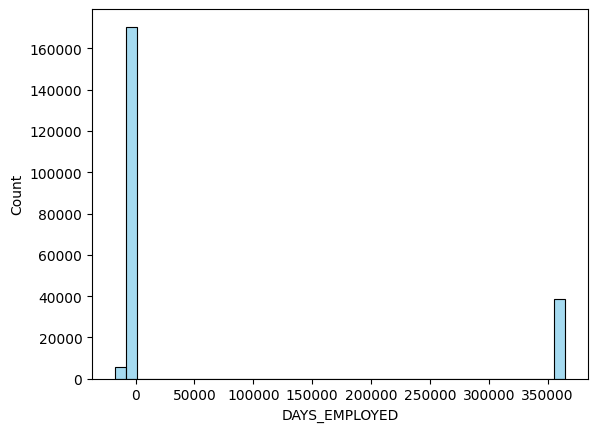

In [233]:
sns.histplot(data_dict['tr']["DAYS_EMPLOYED"], color="skyblue", edgecolor="black", bins=40)

In [234]:
(data['DAYS_EMPLOYED'] / 365).describe()

,DAYS_EMPLOYED
count,307511.000000
mean,174.835742
std,387.056895
min,-49.073973
25%,-7.561644
50%,-3.323288
75%,-0.791781
max,1000.665753


#### Итог у нас есть какое-то особенное значение, из описания признака скопрее всего следует, что либо не известно за сколько человек приступил к своей текущей трудовой деятельности, либо этот срок просто больше определенного значения и поэтому он как бы переполняет буфер, в любом случае этот признак требует особой обработки. Наиболее рационально будет заменить его нанами

In [235]:
data_dict['tr']['DAYS_EMPLOYED'] = data_dict['tr']['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 350000 else x)
data_dict['tr']['DAYS_EMPLOYED'] = data_dict['tst']['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 350000 else x)

После отчистки

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

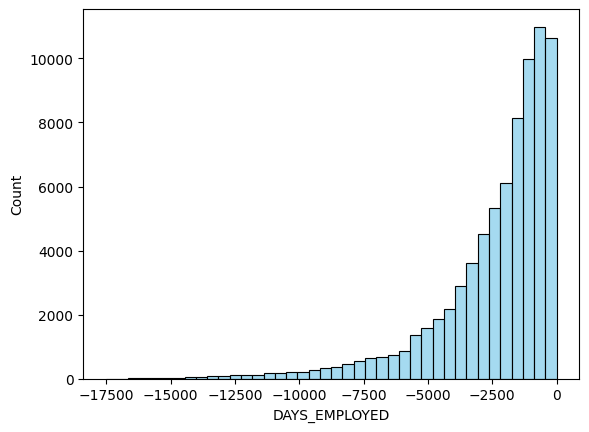

In [236]:
sns.histplot(data_dict['tr']["DAYS_EMPLOYED"], color="skyblue", edgecolor="black", bins=40)

### Посмотрим теперь на другой признак OWN_CAR_AGE, в нем есть точно такое же значение

<Axes: xlabel='OWN_CAR_AGE', ylabel='Count'>

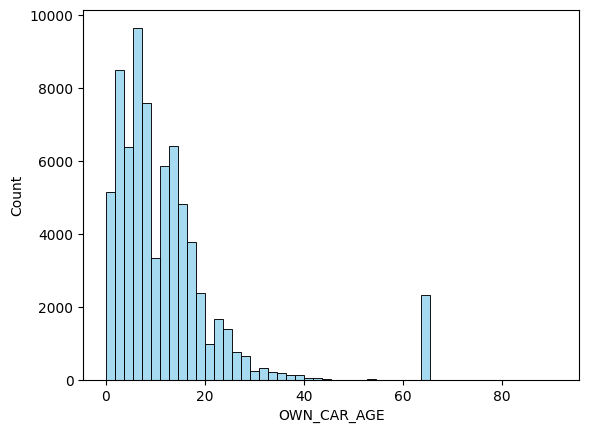

In [237]:
sns.histplot(data_dict['tr']["OWN_CAR_AGE"], color="skyblue", edgecolor="black", bins=50)

In [238]:
data_dict['tr']['OWN_CAR_AGE'] = data_dict['tr']['OWN_CAR_AGE'] .apply(lambda x: np.nan if x>60 else x)
data_dict['tst']['OWN_CAR_AGE'] = data_dict['tst']['OWN_CAR_AGE'] .apply(lambda x: np.nan if x>60 else x)

<Axes: xlabel='OWN_CAR_AGE', ylabel='Count'>

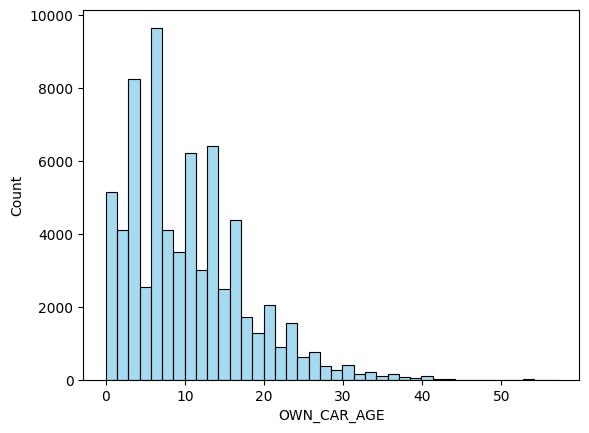

In [239]:
sns.histplot(data_dict['tr']["OWN_CAR_AGE"], color="skyblue", edgecolor="black", bins=40)

In [243]:
from sklearn.preprocessing import TargetEncoder
numerical_trans = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_trans_low = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_trans_big = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('target_encoding', TargetEncoder())
])


num_trans = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
cat_transformer = Pipeline(steps=[
    ('median', SimpleImputer(strategy='median')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, list(num_features)),
        ('low_cat', categorical_trans_low, list(low_cardinality_cols)),
        ('high_cat', categorical_trans_big, list(big_cardinality_cols)),
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        penalty='l2',
        random_state=42,
        solver='newton-cg',
        n_jobs=-1,
        max_iter=1000,
        C= 100,
        )),
])

In [244]:
pipeline.fit(data_dict['tr'].drop(columns=['target', 'sk_id_curr']), data_dict['tr'].target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'OWN_CAR_AGE', 'FLAG_MOBIL',
                                                   'F...
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'FONDKAPREMONT_MODE',
                                                   'HOUSETYPE_MODE',
                                                   'WALLSMATERIAL_MODE',
                                                   'EMERGENCYSTATE_MODE']),
                                                 ('high_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoding',
                                                                   TargetEncoder())]),
                                                  ['OCCUPATION_TYPE',
                                                   'ORGANIZATION_TYPE'])])),
                ('model',
                 LogisticRegression(C=100, max_iter=1000, n_jobs=-1,
                                    random_state=42, solver='newton-cg'))])

In [245]:
roc_auc_score(data_dict['tst'].target, pipeline.predict_proba(data_dict['tst'])[:, 1])

0.7472505800729576

Выбейте на тесте больше `0.752` [roc_auc_score](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.roc_auc_score.html).
Для поиска лучшей модели можно использовать:
- optuna
- [GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)
- свои наблюдения и интуицию

In [ ]:
# ваш код

### Бонусы (до +5 баллов)

За вашу работу можно получить до 5 бонусных баллов <br>
За какие заслуги можно получить бонус:
- скор на тесте значительно больше 0.752 (будет сравниваться с другими работами студентов)
- интересные реализации кастомных трансформеров
- интересные находки в данных, которые увеличили вам скор. Опишите, что вы нашли и как это помогло увеличить скор.
- см. пункт "Хорошие работы" в [уставе](https://t.me/c/2206639786/270/271)

In [ ]:
# ваш код